## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.
- True Positive: Null is false and we rejected the null. 
- True Negative: Null is true and we accepted the null.
- A type I error is when we reject the null hypothesis, but, in reality, the null hypothesis is true. (Rejecting null hypothisis incrorrectly)
- A type II error is when we fail to reject the null hypothesis when it is actually false. p-value > alpha. (Rejecting alternative hypothisis incorrectly)
- p-value: probability that we observed this result due to chance. if it's less than our alpha, we reject the null hypothesis...there IS a difference, or a relationship. p-value < alpha.


### Has the network latency gone up since we switched internet service providers?


##### 
$H_{0}$ - Is the network latency the same or less since we switched internet service providers? 

$H_{a}$ - Is the network latency higher since we switched internet service providers? 

- True Positive: The latency is higher
- True Negative: The latency is lower
- Type I error: p-value > alpha. This would lead us to NOT reject the null hypothisis and believe that network latency was the same or less when in reality it was higher. 
- Type II error: p-value < alpha. This would lead us to believe that the null hypothisis was true when in reality network latency was the same or less. 

### Is the website redesign any good?


##### 
$H_{0}$ - Has the new website maintained or decreased click through rate? 

$H_{a}$ - Has the new website increased clickthrough rate? 

- True Positive: Null is false and we rejected the null. So, in this case clickthrough rate has increased since implimenting the new site.
- True Negative: Null is true and we accepted the null. Clickthrough rate has stayed the same or decreased. 
- Type I error: Rejected the null hypothesis, but, in reality, the null hypothesis is true. So, we think that the new website has increased clickthrough but it actually has not. 
- Type II error: Fail to reject the null hypothesis when it is actually false. So, we think that the new website has maintained or decreased clickthrough.

### Is our television ad driving more sales?

#### 
$H_{0}$ - Have our sales remained the same or decreased since running our ad?

$H_{a}$ - Have our sales increased since running our ad?

- True Positive: Null is false and we rejected the null. So, in this case the ad caused sales to increase.
- True Negative: Null is true and we accepted the null. Sales remained the same or decreased dispite the ad.  
- Type I error: Rejected the null hypothesis, but, in reality, the null hypothesis is true. So, we think that the ad has increased sales.
- Type II error: Fail to reject the null hypothesis when it is actually false. So, we think that the ad has not increased sales. 

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [59]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#### Ho: Average time it takes to sell homes office one = Average time it takes to sell homes office two


#### Ha: Average time it takes to sell homes office one != Average time it takes to sell homes office two

In [23]:
n1 = office1_sample = 40
n2 = office2_sample = 50

mu1 = office1_avg_days = 90
mu2 = office2_avg_days = 100

s1 = office1_stdv = 15
s2 = office2_stdv = 20

alpha = 0.05

degf = office1_sample + office2_sample - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (mu1 - mu2) / (s_p * sqrt(1/n1 + 1/n2))
t

-2.6252287036468456

In [30]:
p = stats.t(degf).cdf(t) * 2
p

0.01020985244923939

In [28]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50)
t,p

(-2.6252287036468456, 0.01020985244923939)

##### We can reject the null hypothesis 

### Load the mpg dataset and use it to answer the following questions:



In [40]:
from pydataset import data
mpg = data('mpg')
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Ho: Fuel efficiency in 1999 = Fuel efficiency in 2008
- Ha: Fuel efficiency in 1999 != Fuel efficiency in 2008


In [57]:
year_diff_df = mpg[(mpg.year==1999) | (mpg.year==2008)]

year_diff_df["avg_mpg"] = year_diff_df[["cty", "hwy"]].mean(axis=1)

year_diff_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


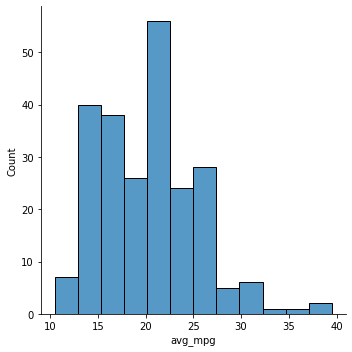

In [87]:
sns.displot(year_diff_df.avg_mpg)

# a = year_diff_df[year_diff_df.year == 1999].avg_mpg
# b = year_diff_df[year_diff_df.year == 2008].avg_mpg
# sns.displot([a, b], color=['blue','green'], alpha=0.5)

plt.show()

In [73]:
yr99 = year_diff_df[year_diff_df.year == 1999].avg_mpg.mean()
yr08 = year_diff_df[year_diff_df.year == 2008].avg_mpg.mean()
yr99, yr08

(20.22222222222222, 20.076923076923077)

In [88]:
#yr99 = year_diff_df.avg_mpg.where(year_diff_df.year == 1999)
#yr08 = year_diff_df.avg_mpg.where(year_diff_df.year == 2008)

yr99 = year_diff_df[year_diff_df.year == 1999].avg_mpg
yr08 = year_diff_df[year_diff_df.year == 2008].avg_mpg

t, p = stats.ttest_ind(yr99, yr08)
t, p

(0.21960177245940962, 0.8263744040323578)

#### Are compact cars more fuel-efficient than the average car?
- Ho: Compact car efficiency <= average car
- Ha: Compact car efficiency > average car

In [93]:
# Change 'class' column name
mpg = mpg.rename(columns={'class': 'typ'})

In [94]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,typ
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [99]:
mpg.typ[mpg.typ == "compact"].count()
mpg.typ.count()

234

In [100]:
# Add average mgp column
mpg["avg_mpg"] = mpg[["cty", "hwy"]].mean(axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,typ,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [105]:
compact_mpg = mpg[mpg.typ == "compact"].avg_mpg

t, p = stats.ttest_1samp(compact_mpg, mpg.avg_mpg.mean())
t, p

(7.896888573132535, 4.1985637943171336e-10)

#### Do manual cars get better gas mileage than automatic cars?
- Ho: Manual car gas milage <= automatic car
- Ha: Manual car gas milage > automatic car